In [ ]:
import pandas as pd
import numpy as np

# Data preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from plotnine import *

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score

import os
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from plotnine import *

import os
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

In [ ]:
# Setting up data (needs heartv1.csv uploaded)
# data set link https://www.kaggle.com/datasets/snmahsa/heart-disease?resource=download
heart = pd.read_csv("heartv1.csv")
heart.isnull().sum() # no missing values
features = ["age", "resting_BP", "chol", "thalach ", "oldpeak"] # all predictors are continuous
heart = heart[features]
heart.head()

,age,resting_BP,chol,thalach,oldpeak
0,65,130,254,147,1.4
1,53,140,261,186,0.0
2,50,122,222,186,0.0
3,47,112,160,138,0.0
4,47,142,309,147,0.0


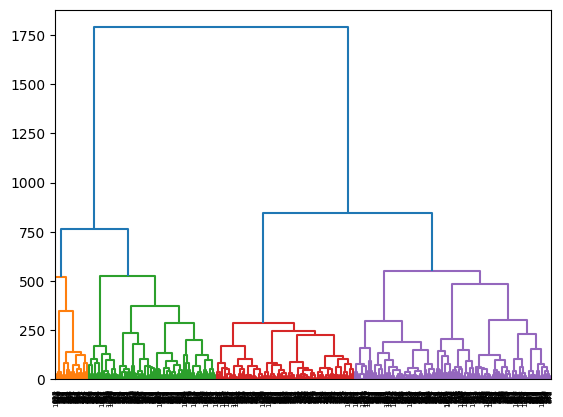

In [ ]:
# Model HAC
hac = AgglomerativeClustering(
                              distance_threshold=0,
                              n_clusters = None,
                              compute_distances=True
                              )

np.random.seed(10)

labels = hac.fit_predict(heart)
def plot_dendrogram(hac, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(hac.children_.shape[0])
    n_samples = len(hac.labels_)
    for i, merge in enumerate(hac.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [hac.children_, hac.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)
linkage_matrix = sch.linkage(heart, method = 'ward')

plot_dendrogram(hac, color_threshold = 600)

In [ ]:
clusters = fcluster(linkage_matrix, t=1000, criterion='distance')
heart['Cluster'] = clusters

gg_list = []
for test in features:
    title = test.capitalize() + " Cluster Performance"
    gg_list.append(ggplot(heart, aes(x = "factor(Cluster)", y = test, fill = "factor(Cluster)"))
          + geom_boxplot() + scale_fill_manual(values=["#D81B60", "#1E88E5", "#FFC107", "#004D40", "#53CF67", "#8F8FBC"]) +
          theme_minimal() +
          labs(x = "Cluster",
               y = "Score",
               title = title))

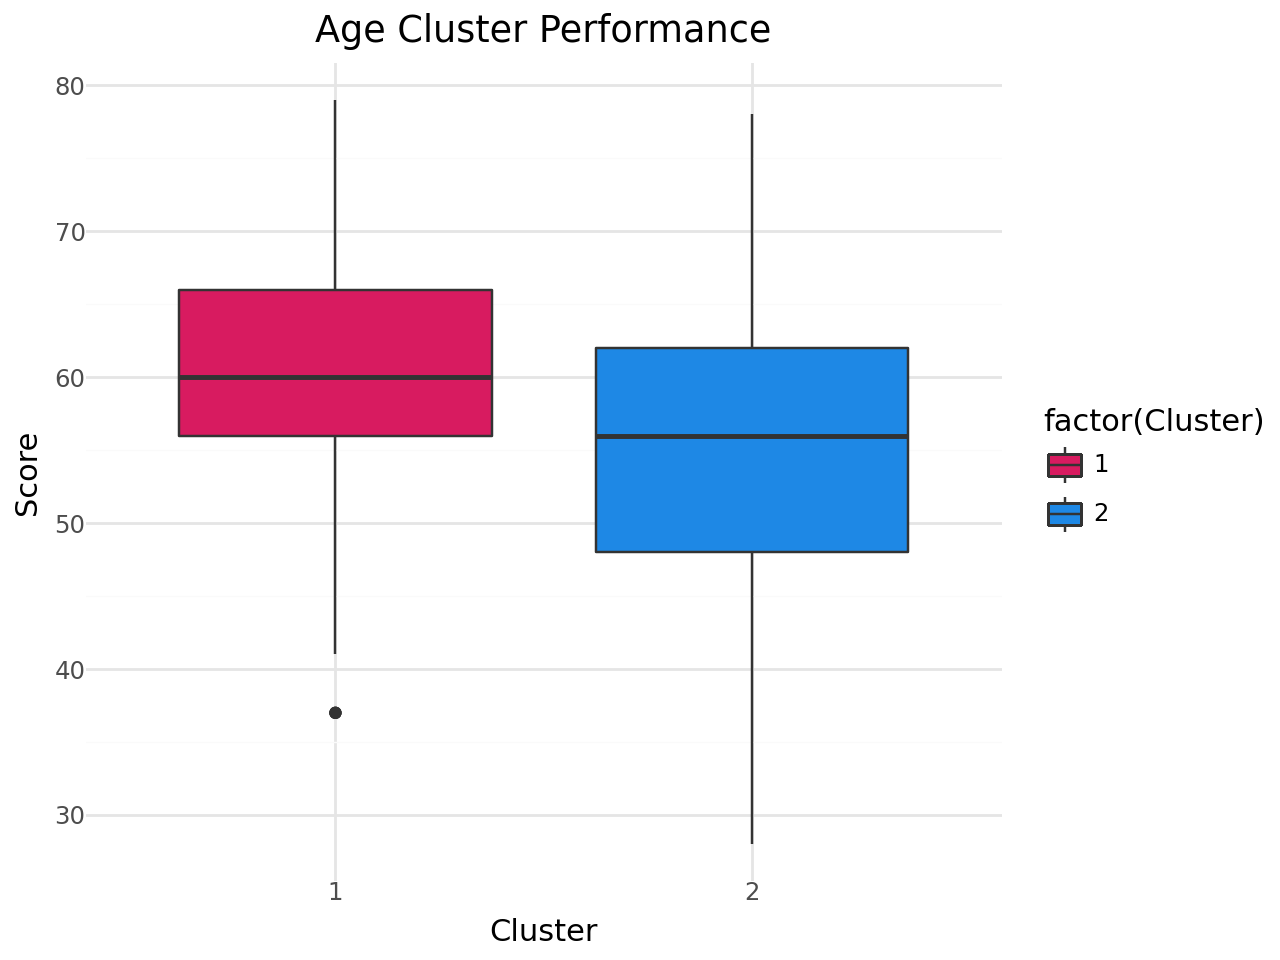

In [ ]:
gg_list[0]

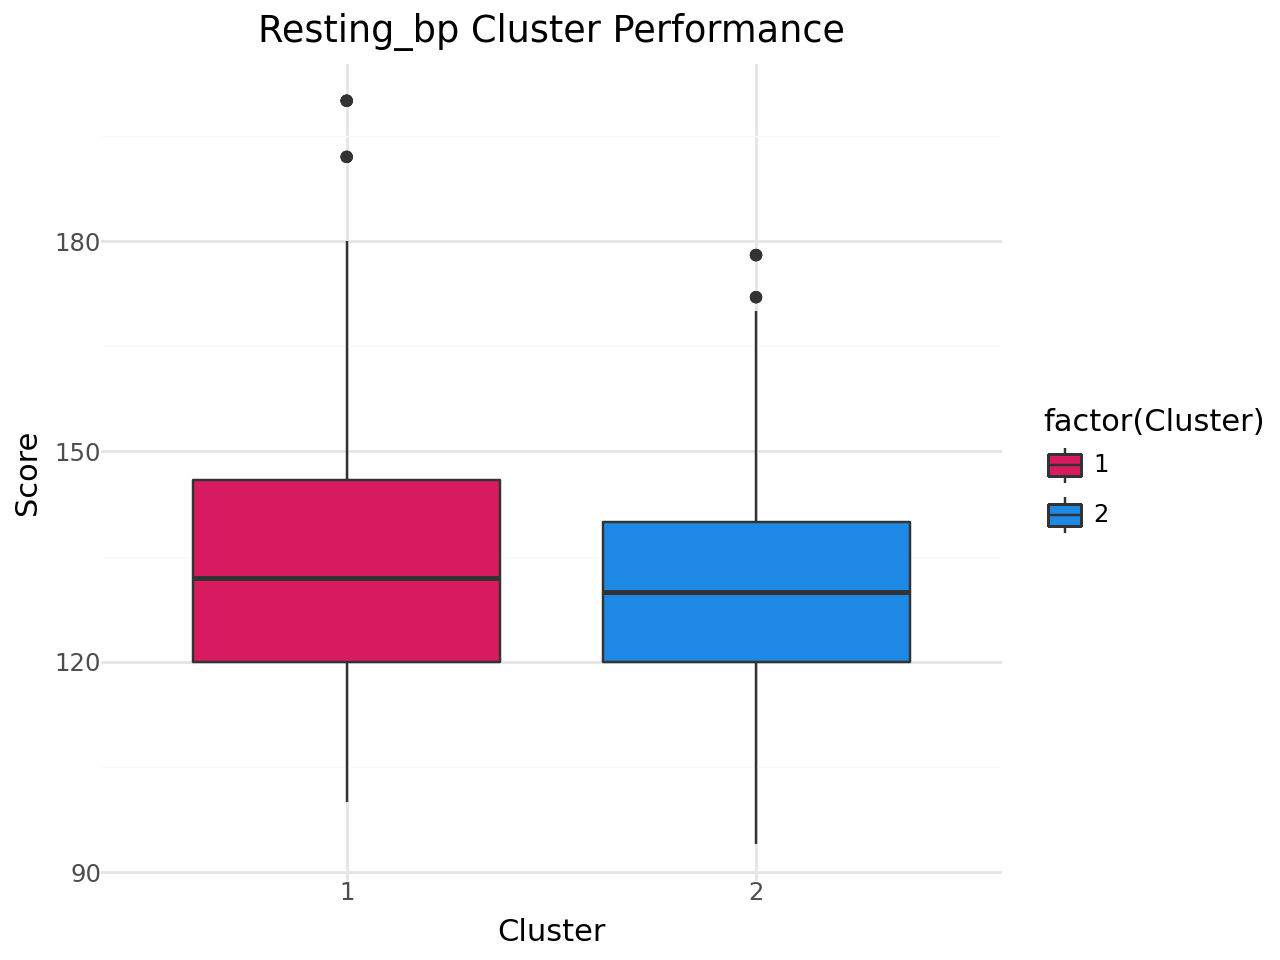

In [ ]:
gg_list[1]

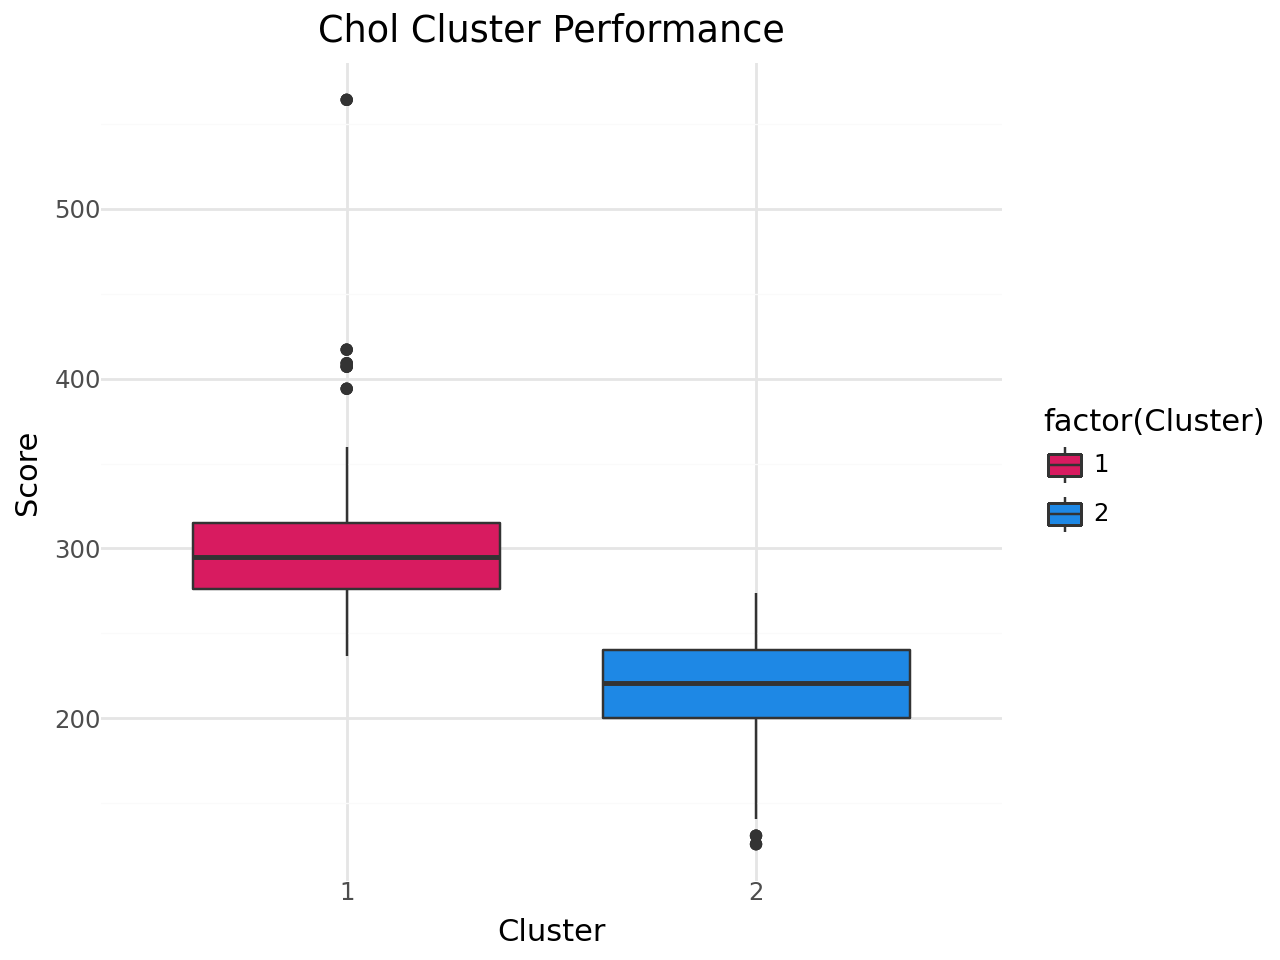

In [ ]:
gg_list[2]

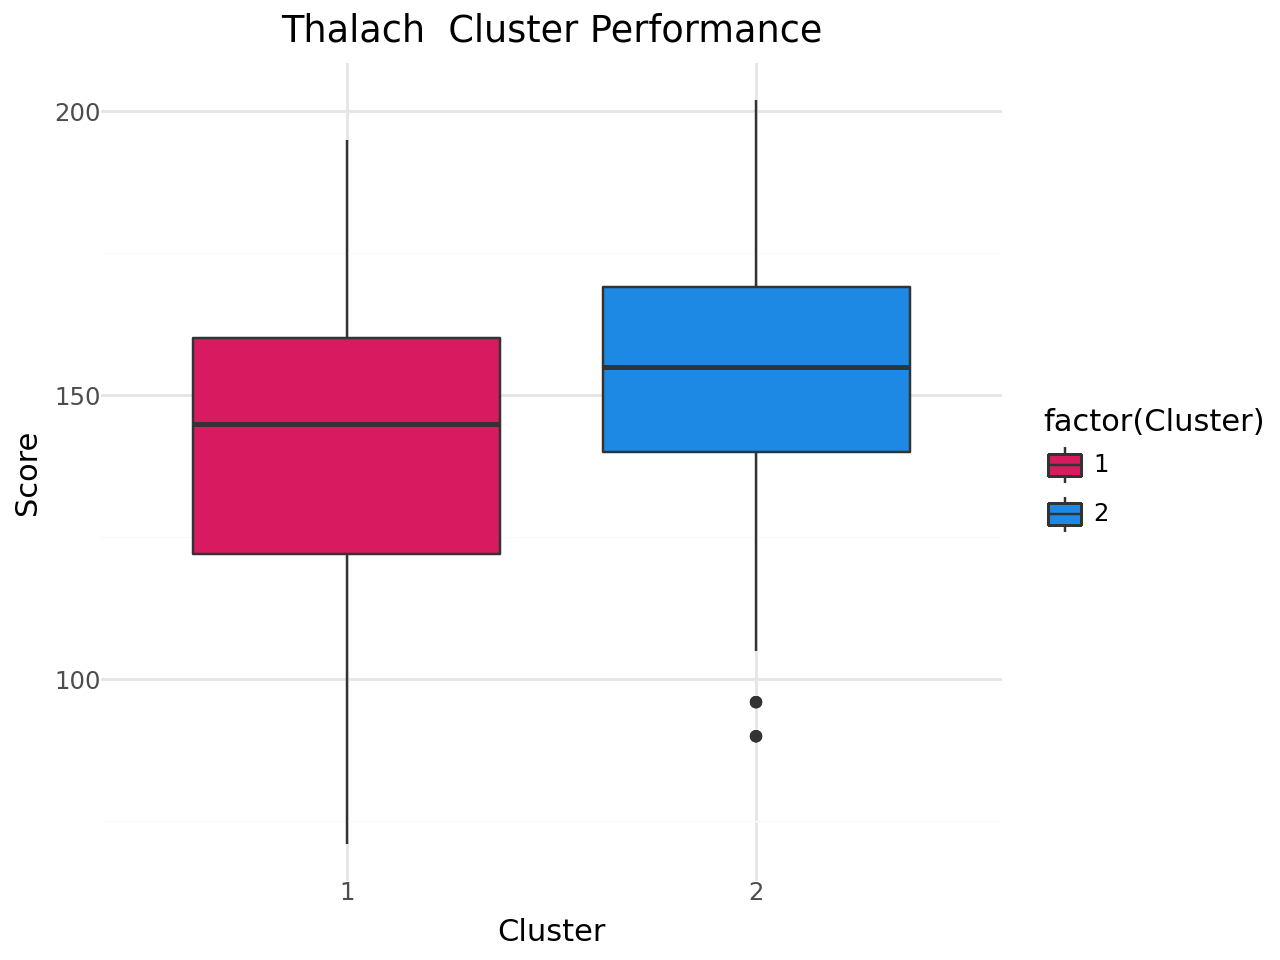

In [ ]:
gg_list[3]

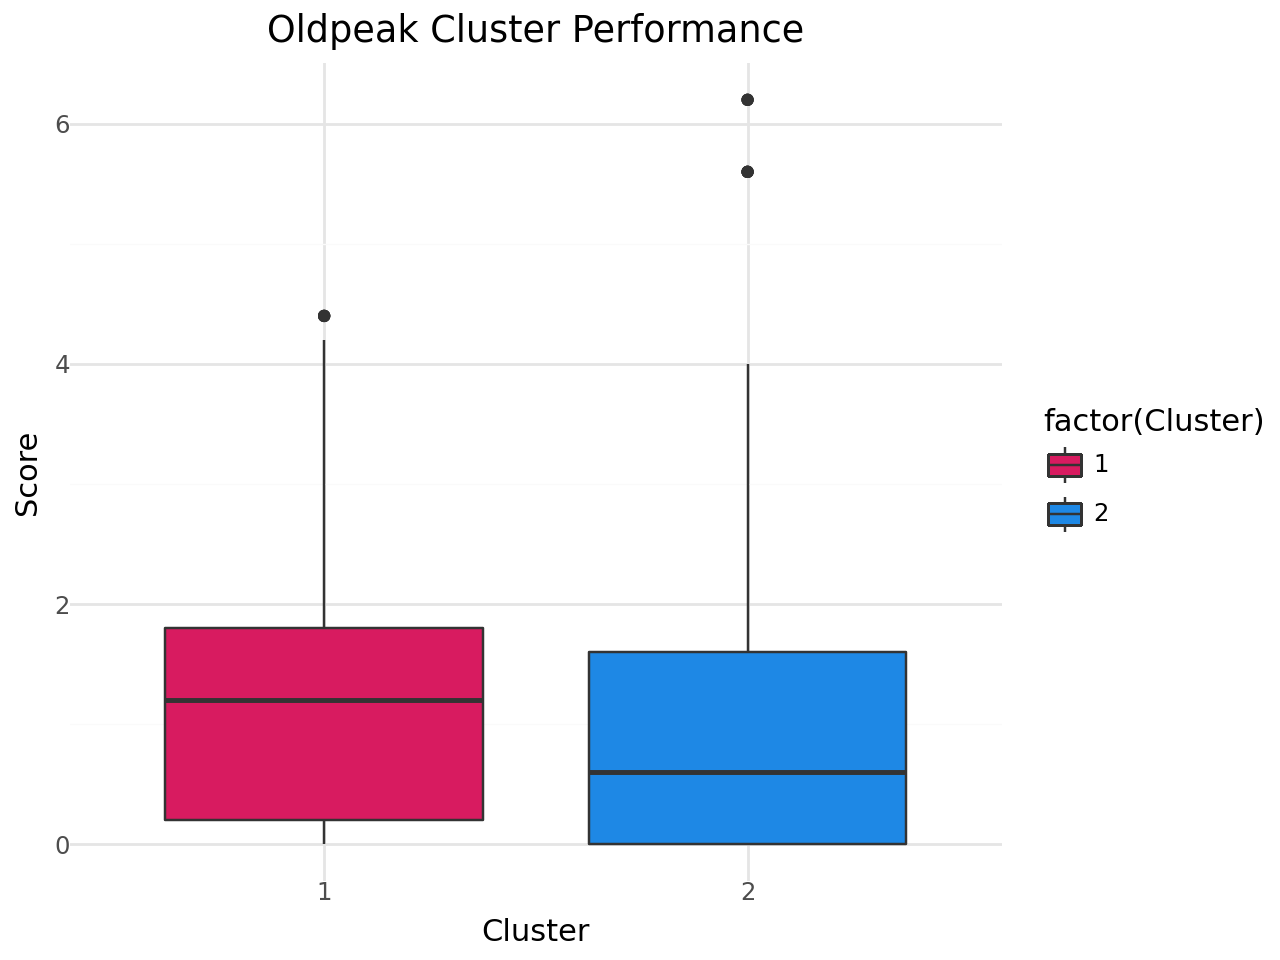

In [ ]:
gg_list[4]